<a href="https://colab.research.google.com/github/Ashwini-Padige/Machine-Learning-Algorithms/blob/main/My__linear_regression_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df=df.drop_duplicates()
df.shape


(15, 2)

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

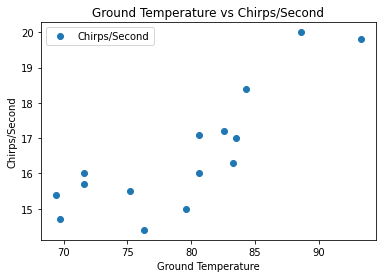

In [ ]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

1) Is there any relationship between the feature and target - Yes
2) Is there any linear relationship between the feature and target - Yes
 3) No transformation is required

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship between Chirps and Ground Temperature => we can go ahead and develop a linear regression model. No transformation required.



In [ ]:
#1.Creating a linear regression model
X = df.loc[:, ['Ground Temperature']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Chirps/Second'].values # target as arrays
# Syntax : dataset.loc[:, :-1]

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 5789)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Intercept:{} ,Coefficients:{}".format(regressor.intercept_, regressor.coef_))

Intercept:0.89418680961621 ,Coefficients:[0.19833608]


In [ ]:
eq = "y = {}*x  + {}".format(regressor.coef_[0],regressor.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y = 0.19833607956406218*x  + 0.89418680961621


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([17.27674698, 17.61391832, 16.68173874])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17.2,17.276747
1,18.4,17.613918
2,15.0,16.681739


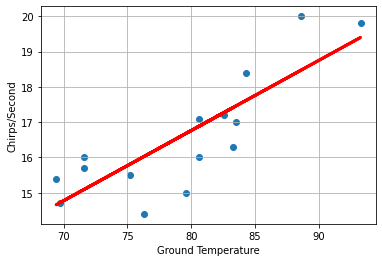

In [ ]:
#2. Plotting the original data and the regression line
plt.scatter(X,y)
plt.plot(X, regressor.predict(X), color="red", linewidth=3)
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.grid()
plt.show()

In [ ]:
# 3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data.
# (0.8 and greater is considered a strong correlation.)

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4194966853418951


Conclusion

We get an R2 score of 0.41 only for this model. It is not sufficient to establish a strong correlation.However, with the available data we can see that there is some positive linear relation between the ground temperatures and chirp frequency.With the availability of more data, we could come up with a better model for the same

In [ ]:
# 4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
f=regressor.predict([[95]]) # perils of extrapolation
print("when temperature goes 95 then cricket sound will be :",f)

when temperature goes 95 then cricket sound will be : [19.73611437]


In [ ]:
# 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.
#     What was the approximate ground temperature that morning?
#x = (y-c)/m
temperature = (18 - 0.89418680961621)/0.19833608
temperature
#It can be approximately calculated from the plot too

86.24660319183374

With an observation of 18 chirps/sec, we expect a ground temp of 86.24˚F

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper = df.Brain.quantile(0.75) + (1.5 * iqr)
lower = df.Brain.quantile(0.75) - (1.5 * iqr)
print(upper)
print(lower)

119.60625
-23.20125


In [ ]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper1 = df.Body.quantile(0.75) + (1.5 * iqr)
lower1 = df.Body.quantile(0.75) - (1.5 * iqr)
print(upper1)
print(lower1)

408.625
-76.625


Removing Outlier



In [ ]:
#values greater than q3 + 1.5iqr -> outlier
#values less than q1 - 1.5iqr -> outlier

In [ ]:
df=df[((df["Brain"]<upper) & (df["Brain"]>lower)) & ((df["Body"]<upper1) & (df["Body"]>lower1))]


In [ ]:
df.describe()

,Brain,Body
count,50.00000,50.000000
mean,9.97438,41.146400
std,21.61098,66.049681
min,0.00500,0.140000
25%,0.31625,3.125000
50%,1.51500,11.750000
75%,4.22375,48.925000
max,100.00000,325.000000


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(50, 2)

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

plot

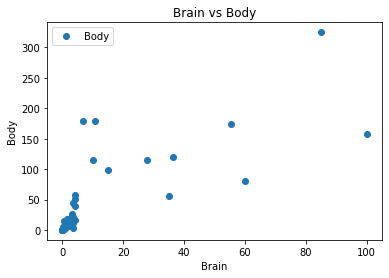

In [ ]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


Train-Test

In [ ]:
X = df.loc[:, ['Body']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Brain'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_test

array([4.288e+00, 3.500e+01, 1.000e-02, 5.500e-01, 1.040e-01, 3.500e+00,
       5.000e-03, 1.200e-01, 3.633e+01, 9.200e-01])

In [ ]:
X_train.shape, X_test.shape

((40, 1), (10, 1))

In [ ]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print("Intercept:{} ,Coefficients:{}".format(regressor.intercept_, regressor.coef_))

Intercept:-0.9328498364171693 ,Coefficients:[0.24919172]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([ 8.83546565, 13.02188657, -0.87055191, -0.3347897 , -0.30987053,
        0.03899788, -0.897963  , -0.68365811, 28.84556089,  0.48754298])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,4.288,8.835466
1,35.000,13.021887
2,0.010,-0.870552
3,0.550,-0.334790
4,0.104,-0.309871
5,3.500,0.038998
6,0.005,-0.897963
7,0.120,-0.683658
8,36.330,28.845561
9,0.920,0.487543


In [ ]:
eq = "y= {}*x  + {}".format(regressor.coef_,regressor.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y= [0.24919172]*x  + -0.9328498364171693


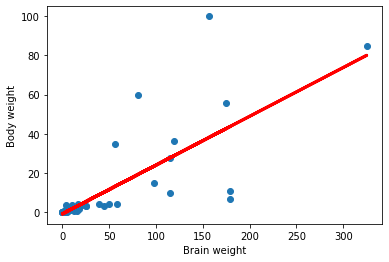

In [ ]:
#2.Chart the original data and the equation on the chart.
plt.scatter(X,y)
plt.plot(X, regressor.predict(X), color="red", linewidth=3)
plt.xlabel("Brain weight")
plt.ylabel("Body weight")
plt.show()

In [ ]:
# 3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data.
# (0.8 and greater is considered a strong correlation.)
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


R2- SCORE: 0.7010002644662052


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None,
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes


Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df= df.drop_duplicates()


In [ ]:
df.shape

(52, 6)

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
q3 = df.Sex.quantile(0.75)
q1 = df.Sex.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5)
lower = q1 - (iqr*1.5)
lower, upper

(-1.5, 2.5)

In [ ]:
q3 = df.Rank.quantile(0.75)
q1 = df.Rank.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5)
lower = q1 - (iqr*1.5)
lower, upper

(-2.0, 6.0)

In [ ]:
q3 = df.Year.quantile(0.75)
q1 = df.Year.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5)
lower = q1 - (iqr*1.5)
lower, upper

(-9.0, 23.0)

In [ ]:
q3 = df.Degree.quantile(0.75)
q1 = df.Degree.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5)
lower = q1 - (iqr*1.5)
lower, upper

(-1.5, 2.5)

In [ ]:
q3 = df.YSdeg.quantile(0.75)
q1 = df.YSdeg.quantile(0.25)
iqr = q3-q1
upper = q3 + (iqr*1.5)
lower = q1 - (iqr*1.5)
lower, upper

(-18.0, 48.0)

In [ ]:
df.YSdeg = df.YSdeg.clip(-18.0, 48.0)

In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

1.Find the linear regression equation for this data using columns 1-5 to column

In [ ]:
input_cols = ['Sex','Rank','Year','Degree','YSdeg']
output_col = 'Salary'


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df.iloc[:,:5]
Y = df.iloc[:,5]
model = LinearRegression()
model.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))

Intercept:11410.14654725559 ,Coefficients:[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [ ]:
eq = "Salary = {}*{} + {}*{} + {}*{} + {}*{} + {}*{} + {}".format(input_cols[0],model.coef_[0],input_cols[1],model.coef_[1],input_cols[2],model.coef_[2],input_cols[3],model.coef_[3],input_cols[4],model.coef_[4],model.intercept_)
print("The linear equation is \n",eq)

The linear equation is 
 Salary = Sex*1241.792499601427 + Rank*5586.1814495214385 + Year*482.85976782882153 + Degree*-1331.6440634059095 + YSdeg*-128.79057354486122 + 11410.14654725559


In [ ]:
print(model.score(X,Y))

0.8547180674410969


2.Find the selection of columns with the best  R2  score.

In [ ]:
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [ ]:
combos = input_combos(input_cols)

In [ ]:
def combo_r2scores( all_combos, df, output='Salary'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Salary']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [ ]:
combo_r2scores(combos,df,'Salary')

{0.06389892583288004: ('Sex',),
 0.7525360539274633: ('Rank',),
 0.49093702676921624: ('Year',),
 0.004861680984748373: ('Degree',),
 0.45542813458360276: ('YSdeg',),
 0.7554917749443394: ('Sex', 'Rank'),
 0.4911360941886388: ('Sex', 'Year'),
 0.06643739842018881: ('Sex', 'Degree'),
 0.4930479271966782: ('Sex', 'YSdeg'),
 0.8436480933264597: ('Rank', 'Year'),
 0.7557961688386643: ('Rank', 'Degree'),
 0.7623948189698249: ('Rank', 'YSdeg'),
 0.4919014149016441: ('Year', 'Degree'),
 0.5782019226431887: ('Year', 'YSdeg'),
 0.5409662288237875: ('Degree', 'YSdeg'),
 0.8454319861987166: ('Sex', 'Rank', 'Year'),
 0.7583144768153613: ('Sex', 'Rank', 'Degree'),
 0.7666122610227071: ('Sex', 'Rank', 'YSdeg'),
 0.49207944757472966: ('Sex', 'Year', 'Degree'),
 0.5808063918180406: ('Sex', 'Year', 'YSdeg'),
 0.5832708257660315: ('Sex', 'Degree', 'YSdeg'),
 0.8437395200874137: ('Rank', 'Year', 'Degree'),
 0.8456725764485596: ('Rank', 'Year', 'YSdeg'),
 0.7625149185326454: ('Rank', 'Degree', 'YSdeg'),
 

With this we can see that the combination of all 5 input columns gives the maximum r2 score. Rank and Year together seems to be a great combination because with only these 2 columns we reach an r2 score of 0.843

Task 3
Report whether sex is a factor in salary.



At the very first instance, the model with only sex as the input column has an r2score of just 0.063 which shows it has no direct influence on salary.

Conclusion: Sex is not a factor in salary.